<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span><ul class="toc-item"><li><span><a href="#Notebook-Summary" data-toc-modified-id="Notebook-Summary-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Notebook Summary</a></span></li><li><span><a href="#CNN---Convolutional-Neural-Nets-Overview" data-toc-modified-id="CNN---Convolutional-Neural-Nets-Overview-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>CNN - Convolutional Neural Nets Overview</a></span></li><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Import Libraries</a></span></li></ul></li><li><span><a href="#Data-Collection-&amp;-Data-Exploration" data-toc-modified-id="Data-Collection-&amp;-Data-Exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Collection &amp; Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Data-Collection" data-toc-modified-id="Data-Collection-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Collection</a></span><ul class="toc-item"><li><span><a href="#Download-Images-for-Your-Dataset" data-toc-modified-id="Download-Images-for-Your-Dataset-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Download Images for Your Dataset</a></span></li><li><span><a href="#Prune-Images" data-toc-modified-id="Prune-Images-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Prune Images</a></span></li></ul></li><li><span><a href="#Import-images" data-toc-modified-id="Import-images-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Import images</a></span></li><li><span><a href="#Data-Exploration-&amp;-Visualization" data-toc-modified-id="Data-Exploration-&amp;-Visualization-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data Exploration &amp; Visualization</a></span><ul class="toc-item"><li><span><a href="#Store-data-in-databunch-&amp;-view-images" data-toc-modified-id="Store-data-in-databunch-&amp;-view-images-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Store data in databunch &amp; view images</a></span></li></ul></li></ul></li><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Training</a></span><ul class="toc-item"><li><span><a href="#Model-selection" data-toc-modified-id="Model-selection-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Model selection</a></span></li><li><span><a href="#Model-Set-Up-&amp;-Hyperparameters" data-toc-modified-id="Model-Set-Up-&amp;-Hyperparameters-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Model Set Up &amp; Hyperparameters</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Training</a></span><ul class="toc-item"><li><span><a href="#Training---Phase-1---128x128-Images" data-toc-modified-id="Training---Phase-1---128x128-Images-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Training - Phase 1 - 128x128 Images</a></span></li><li><span><a href="#Training---Phase-2---256x256-Images" data-toc-modified-id="Training---Phase-2---256x256-Images-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Training - Phase 2 - 256x256 Images</a></span></li><li><span><a href="#Training---Load-Saved-Model-&amp;-Continue-Training" data-toc-modified-id="Training---Load-Saved-Model-&amp;-Continue-Training-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Training - Load Saved Model &amp; Continue Training</a></span></li></ul></li></ul></li><li><span><a href="#Model-Evalutation" data-toc-modified-id="Model-Evalutation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Evalutation</a></span><ul class="toc-item"><li><span><a href="#Validation-Set---Confusion-Matrix" data-toc-modified-id="Validation-Set---Confusion-Matrix-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Validation Set - Confusion Matrix</a></span></li><li><span><a href="#Cleaning-Up" data-toc-modified-id="Cleaning-Up-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Cleaning Up</a></span></li><li><span><a href="#Test-Set---Evaluate-Performance" data-toc-modified-id="Test-Set---Evaluate-Performance-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Test Set - Evaluate Performance</a></span></li></ul></li></ul></div>

# Overview

## Notebook Summary

This notebook walks through the steps to build and train the multi-class image classification algorithm used on 
__[wittytourist.com](https://wittytourist.com)__

It is a convolutional neural net (CNN) based on the resnet50 architecture (has 50 layers) and you can learn the details in the __[resnet paper](https://arxiv.org/pdf/1512.03385.pdf)__. The model starts with pre-trained weights from ImageNet and with transfer learning, it is fine-tuned to fit the image classes in this notebook.

## CNN - Convolutional Neural Nets Overview

To understand the underlying math and intuition behind CNNs, check out this step-by-step __[blog post](https://towardsdatascience.com/cutting-edge-face-recognition-is-complicated-these-spreadsheets-make-it-easier-e7864dbf0e1a)__ I built using Excel.

![Image of CNN in Excel](https://cdn-images-1.medium.com/max/2000/1*m65nIVO62a4Dua2QzmPI2A.png)

![Image of CNN in Excel](https://cdn-images-1.medium.com/max/2000/1*JrxHmdQH4HFNj4aBtuuEpQ.png)

## Import Libraries

Import library dependencies and note that the fastai library already has most dependencies needed (numpy, pandas, etc.)

In [1]:
from fastai import *
from fastai.vision import *
import zipfile
from fastai.widgets import *

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Data Collection & Data Exploration

## Data Collection

There are 2 steps to make your own training set of images:

1. Download images
2. Prune images (i.e. remove mislabeled images, images not representative of your use case, etc.)

### Download Images for Your Dataset

There are several ways you can download the images to build your dataset. Here are a few resources you can check out:

1. __Google__
    1. [Google images - fast.ai script](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-download.ipynb)
    2. [Google images - another download script](https://github.com/hardikvasa/google-images-download)
    
    
2. __Instagram__
    1. [Instagram API](https://www.instagram.com/developer/)
    2. [Instalooter](https://github.com/althonos/instaLooter)

To ensure my images were representative of the typical use case (taking & sharing a photo on social media), I trained the model with images downloaded from Instagram.

### Prune Images

Getting a large and clean dataset of images is the most time-consuming (but also most important) part of building an accurate image classification model. After downloading over 5,000 images, I used my photo management software (Adobe Lightroom) to go through each image to accept or reject it.

After hours of pruning images, I was left with:
- ~5,000 training/validation images, ~1.1 GB, and ~1,000 test images
- 13 classes of images
- ~300 images per image class

I created 4 .zip files to be imported and used for training & validating the model.  You could create 1 .zip file with all images, but I had issues with the upload being interrupted so I opted to create 4 upload files.

## Import images

In the Jupyter notebook, start by uploading zipped file(s) which contains sub-folders for each class of images.  I stored files in the path:

- /home/jupyter/projects/05-witty-tourist/images/train/

Each sub-folder is a separate class that contains images for that class:

- /home/jupyter/projects/05-witty-tourist/images/train/class-1
- /home/jupyter/projects/05-witty-tourist/images/train/class-2
- /home/jupyter/projects/05-witty-tourist/images/train/class-3
- ...

After uploading the zipped file(s), unzip the file(s)

In [3]:
# only run this cell once
sf_images_zip = zipfile.ZipFile('/home/jupyter/projects/05-witty-tourist/images/train/sf-images.zip')
sf_images.extractall('/home/jupyter/projects/05-witty-tourist/images/train')
sf_images.close()

Set the path to your project.

In [3]:
path = Path('/home/jupyter/projects/05-witty-tourist/')

Set the classes of the images you want to classify and validate each file is an acceptable image format.

I use 13 of the San Franciso Bay area's most iconic landmarks/sights to see.

In [4]:
# create classes you want to train your network to detect
classes = ['the Golden Gate Bridge',
           'the Oakland Bay Bridge',
           'a cable car',
           'Lombard Street',
           'Alcatraz',
           'the Painted Ladies at Alamo Square',
           'the Palace of Fine Arts',
           'the sea lions at Pier 39',
           'the Transamerica Pyramid',
           'Muir Woods',
           'Coit Tower',
           'Fisherman\'s Wharf',
           'Ghirardelli Square'
          ]

In [5]:
# set path to training images location
train_path = Path('/home/jupyter/projects/05-witty-tourist/images/train')

# verify each image is an acceptable image file
for c in classes:
    print(c)
    verify_images(train_path/c, delete=True, max_workers=8)

the Golden Gate Bridge


the Oakland Bay Bridge


a cable car


Lombard Street


Alcatraz


the Painted Ladies at Alamo Square


the Palace of Fine Arts


the sea lions at Pier 39


the Transamerica Pyramid


Muir Woods


Coit Tower


Fisherman's Wharf


Ghirardelli Square


## Data Exploration & Visualization

Now, let's take a look at some of our pictures.

### Store data in databunch & view images

In [6]:
np.random.seed(42)
data = ImageDataBunch.from_folder(train_path, train=".", valid_pct=0.20,
                                  ds_tfms=get_transforms(), size=128,
                                  num_workers=4).normalize(imagenet_stats)

Create an empty folder called 'models' and view files stored there

In [7]:
# only run this cell once
%mkdir "/home/jupyter/projects/05-witty-tourist/models"

In [8]:
# set path to your models
model_path = Path('/home/jupyter/projects/05-witty-tourist/models')

# view current files stored in models folder
model_path.ls() 

[]

In [9]:
# view classes
data.classes

['Alcatraz',
 'Coit Tower',
 "Fisherman's Wharf",
 'Ghirardelli Square',
 'Lombard Street',
 'Muir Woods',
 'a cable car',
 'the Golden Gate Bridge',
 'the Oakland Bay Bridge',
 'the Painted Ladies at Alamo Square',
 'the Palace of Fine Arts',
 'the Transamerica Pyramid',
 'the sea lions at Pier 39']

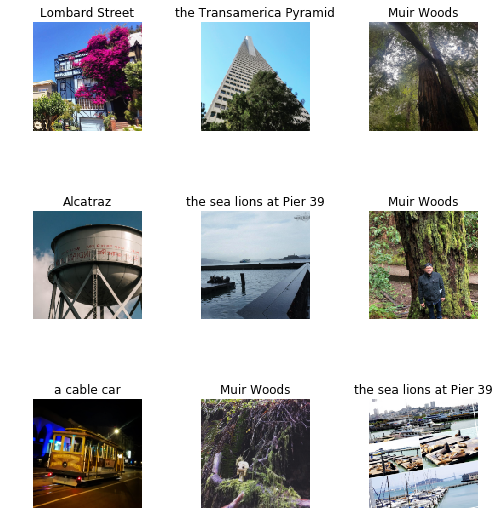

In [10]:
# view sample images
data.show_batch(rows=3, figsize=(7,8))

In [11]:
# show counts of classes, number of training images, number of validation images
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Alcatraz',
  'Coit Tower',
  "Fisherman's Wharf",
  'Ghirardelli Square',
  'Lombard Street',
  'Muir Woods',
  'a cable car',
  'the Golden Gate Bridge',
  'the Oakland Bay Bridge',
  'the Painted Ladies at Alamo Square',
  'the Palace of Fine Arts',
  'the Transamerica Pyramid',
  'the sea lions at Pier 39'],
 13,
 3825,
 956)

# Model Training

## Model selection

We'll train using ResNet-50 as our backbone architecture.  You can learn the details in the __[resnet paper](https://arxiv.org/pdf/1512.03385.pdf)__.

## Model Set Up & Hyperparameters

In [12]:
# set batch size (# of images) and lower to 48, 32, or 16 if you run out of memory
bs = 64     

In [13]:
# Remove comment if you want to set transformations specific to your dataset
tfms = get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.2)

In [14]:
np.random.seed(42)
src = (ImageList.from_folder(train_path) # path of training images
        .random_split_by_pct(0.2)        # split your images into training/validation sets
        .label_from_folder())            # label each class of images based on folder name

## Training

We train our model in 2 phases with 4 overall stages.  After each stage, we save the model.

__Phase 1: image size = 128x128x3__
1. Train the head of our pre-trained ImageNet model and freeze it.
2. Fine tune the model by unfreezing it and training the entire model

__Phase 2: image size = 256x256x3__
3. Train the head of our pre-trained ImageNet model and freeze it.
4. Fine tune the model by unfreezing it and training the entire model

### Training - Phase 1 - 128x128 Images

In [15]:
# transform images, re-size to 128x128x3, create databunch and normalize with the pre-trained ImageNet stats
data = (src.transform(tfms=tfms, size=128) 
        .databunch().normalize(imagenet_stats))        

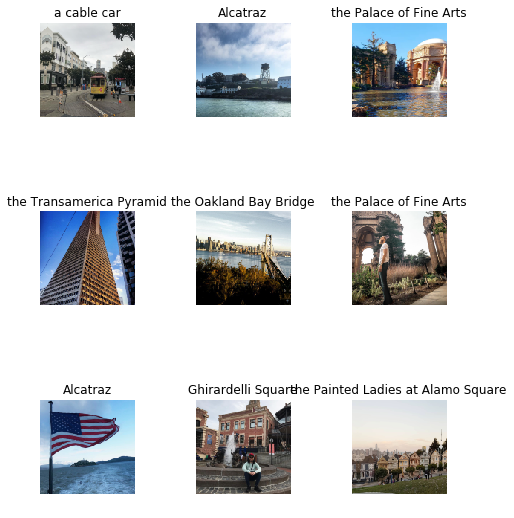

In [16]:
# view data to ensure it was stored propertly in the data bunch
data.show_batch(rows=3, figsize=(7,8))

In [17]:
# view class info - number of classes, number of training images, number of validation images
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Alcatraz',
  'Coit Tower',
  "Fisherman's Wharf",
  'Ghirardelli Square',
  'Lombard Street',
  'Muir Woods',
  'a cable car',
  'the Golden Gate Bridge',
  'the Oakland Bay Bridge',
  'the Painted Ladies at Alamo Square',
  'the Palace of Fine Arts',
  'the Transamerica Pyramid',
  'the sea lions at Pier 39'],
 13,
 3825,
 956)

In [18]:
# create learner - the metric is a simply accuracy rate (# of correctly predicted image / # of predicted images)
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [19]:
# use learning rate finder to find the optimal learning rate for training
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


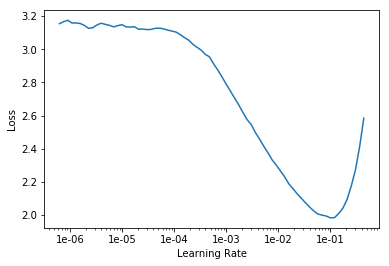

In [20]:
learn.recorder.plot()

Then we can fit the head of our network. Using the plot above, choose the learning rate with the steepest slope.

In [21]:
lr = 1e-2

In [22]:
learn.fit_one_cycle(5, slice(lr))

In [23]:
# provide path to your models folder and provide filename to save 'stage 1' .pth file as
learn.save('/home/jupyter/projects/05-witty-tourist/models/wt-stage-1-resnet50-13-classes-128')

In [24]:
# provide path to your models folder and provide filename to save 'stage 1' .pkl file as
learn.export('/home/jupyter/projects/05-witty-tourist/models/wt-stage-1-resnet50-13-classes-128')

...And fine-tune the whole model:

In [25]:
learn.unfreeze()

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


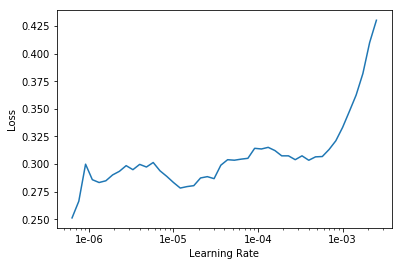

In [27]:
learn.recorder.plot()

For the 1st half of the learning rate, identify the learning right before it goes to infinity and then go back 10x.

In [28]:
lr = 1e-4

In [29]:
learn.fit_one_cycle(7, slice(lr, lr/5))

In [30]:
# provide path to your models folder and provide filename to save 'stage 2' .pth file as
learn.save('/home/jupyter/projects/05-witty-tourist/models/wt-stage-2-resnet50-13-classes-128')

In [31]:
# provide path to your models folder and provide filename to save 'stage 2' .pkl file as
learn.export('/home/jupyter/projects/05-witty-tourist/models/wt-stage-2-resnet50-13-classes-128')

### Training - Phase 2 - 256x256 Images

...Re-train the same images, but use a larger image size

In [32]:
# transform images, re-size to 256x256x3, create databunch and normalize with the pre-trained ImageNet stats
data = (src.transform(tfms, size=256)
        .databunch(bs=bs//2).normalize(imagenet_stats))

# update learner with re-sized images
learn.data = data

# check size of images in dataset
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

In [33]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


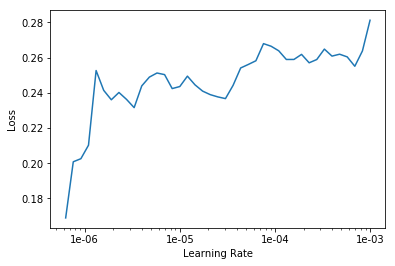

In [34]:
learn.recorder.plot()

Identify the learning right before it goes to infinity and then go back 10x.

In [35]:
lr = 1e-4

In [36]:
learn.fit_one_cycle(5, slice(lr))

In [37]:
# provide path to your models folder and provide filename to save 'stage 3' .pth file as
learn.save('/home/jupyter/projects/05-witty-tourist/models/wt-stage-3-resnet50-13-classes-256')

In [38]:
# provide path to your models folder and provide filename to save 'stage 3' .pkl file as
learn.export('/home/jupyter/projects/05-witty-tourist/models/wt-stage-3-resnet50-13-classes-256')

...And fine-tune the whole model:

In [39]:
learn.unfreeze()

In [40]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


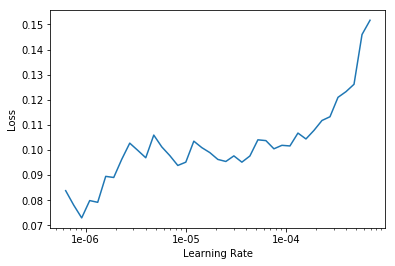

In [41]:
learn.recorder.plot()

Identify the learning right before it goes to infinity and then go back 10x.

In [42]:
lr = 1e-5

In [43]:
learn.fit_one_cycle(5, slice(lr, lr/5))

In [44]:
# provide path to your models folder and provide filename to save 'stage 4' .pth file as
learn.save('/home/jupyter/projects/05-witty-tourist/models/wt-stage-4-resnet50-13-classes-256')

In [45]:
# provide path to your models folder and provide filename to save 'stage 4' .pkl file as
learn.export('/home/jupyter/projects/05-witty-tourist/models/wt-stage-4-resnet50-13-classes-256')

### Training - Load Saved Model & Continue Training

Load a saved model (the .pkl file saved during learn.export). This has the model's saved weights, not the architecture or data.

Uncomment this section, as needed to use.

In [49]:
# # load saved learner
# learn = load_learner(model_path,'wt-stage-4-resnet50-13-classes-256')

In [50]:
# # unfreeze model if you want to continue to train
# learn.unfreeze()

In [51]:
# # create image databunch with your images

# # transform images, re-size to 256x256x3, create databunch and normalize with the pre-trained ImageNet stats
# data = (src.transform(tfms, size=256)
#         .databunch(bs=bs//2).normalize(imagenet_stats))

# # update learner with re-sized images
# learn.data = data

# # check size of images in dataset
# data.train_ds[0][0].shape

In [52]:
# learn.lr_find()

In [53]:
# learn.recorder.plot()

# Model Evalutation

Let's take a look at our losses to better understand which images the model is mis-identifying and to check if we need to prune our dataset to remove bad or mis-labeled images.

## Validation Set - Confusion Matrix

In [46]:
interp = ClassificationInterpretation.from_learner(learn)

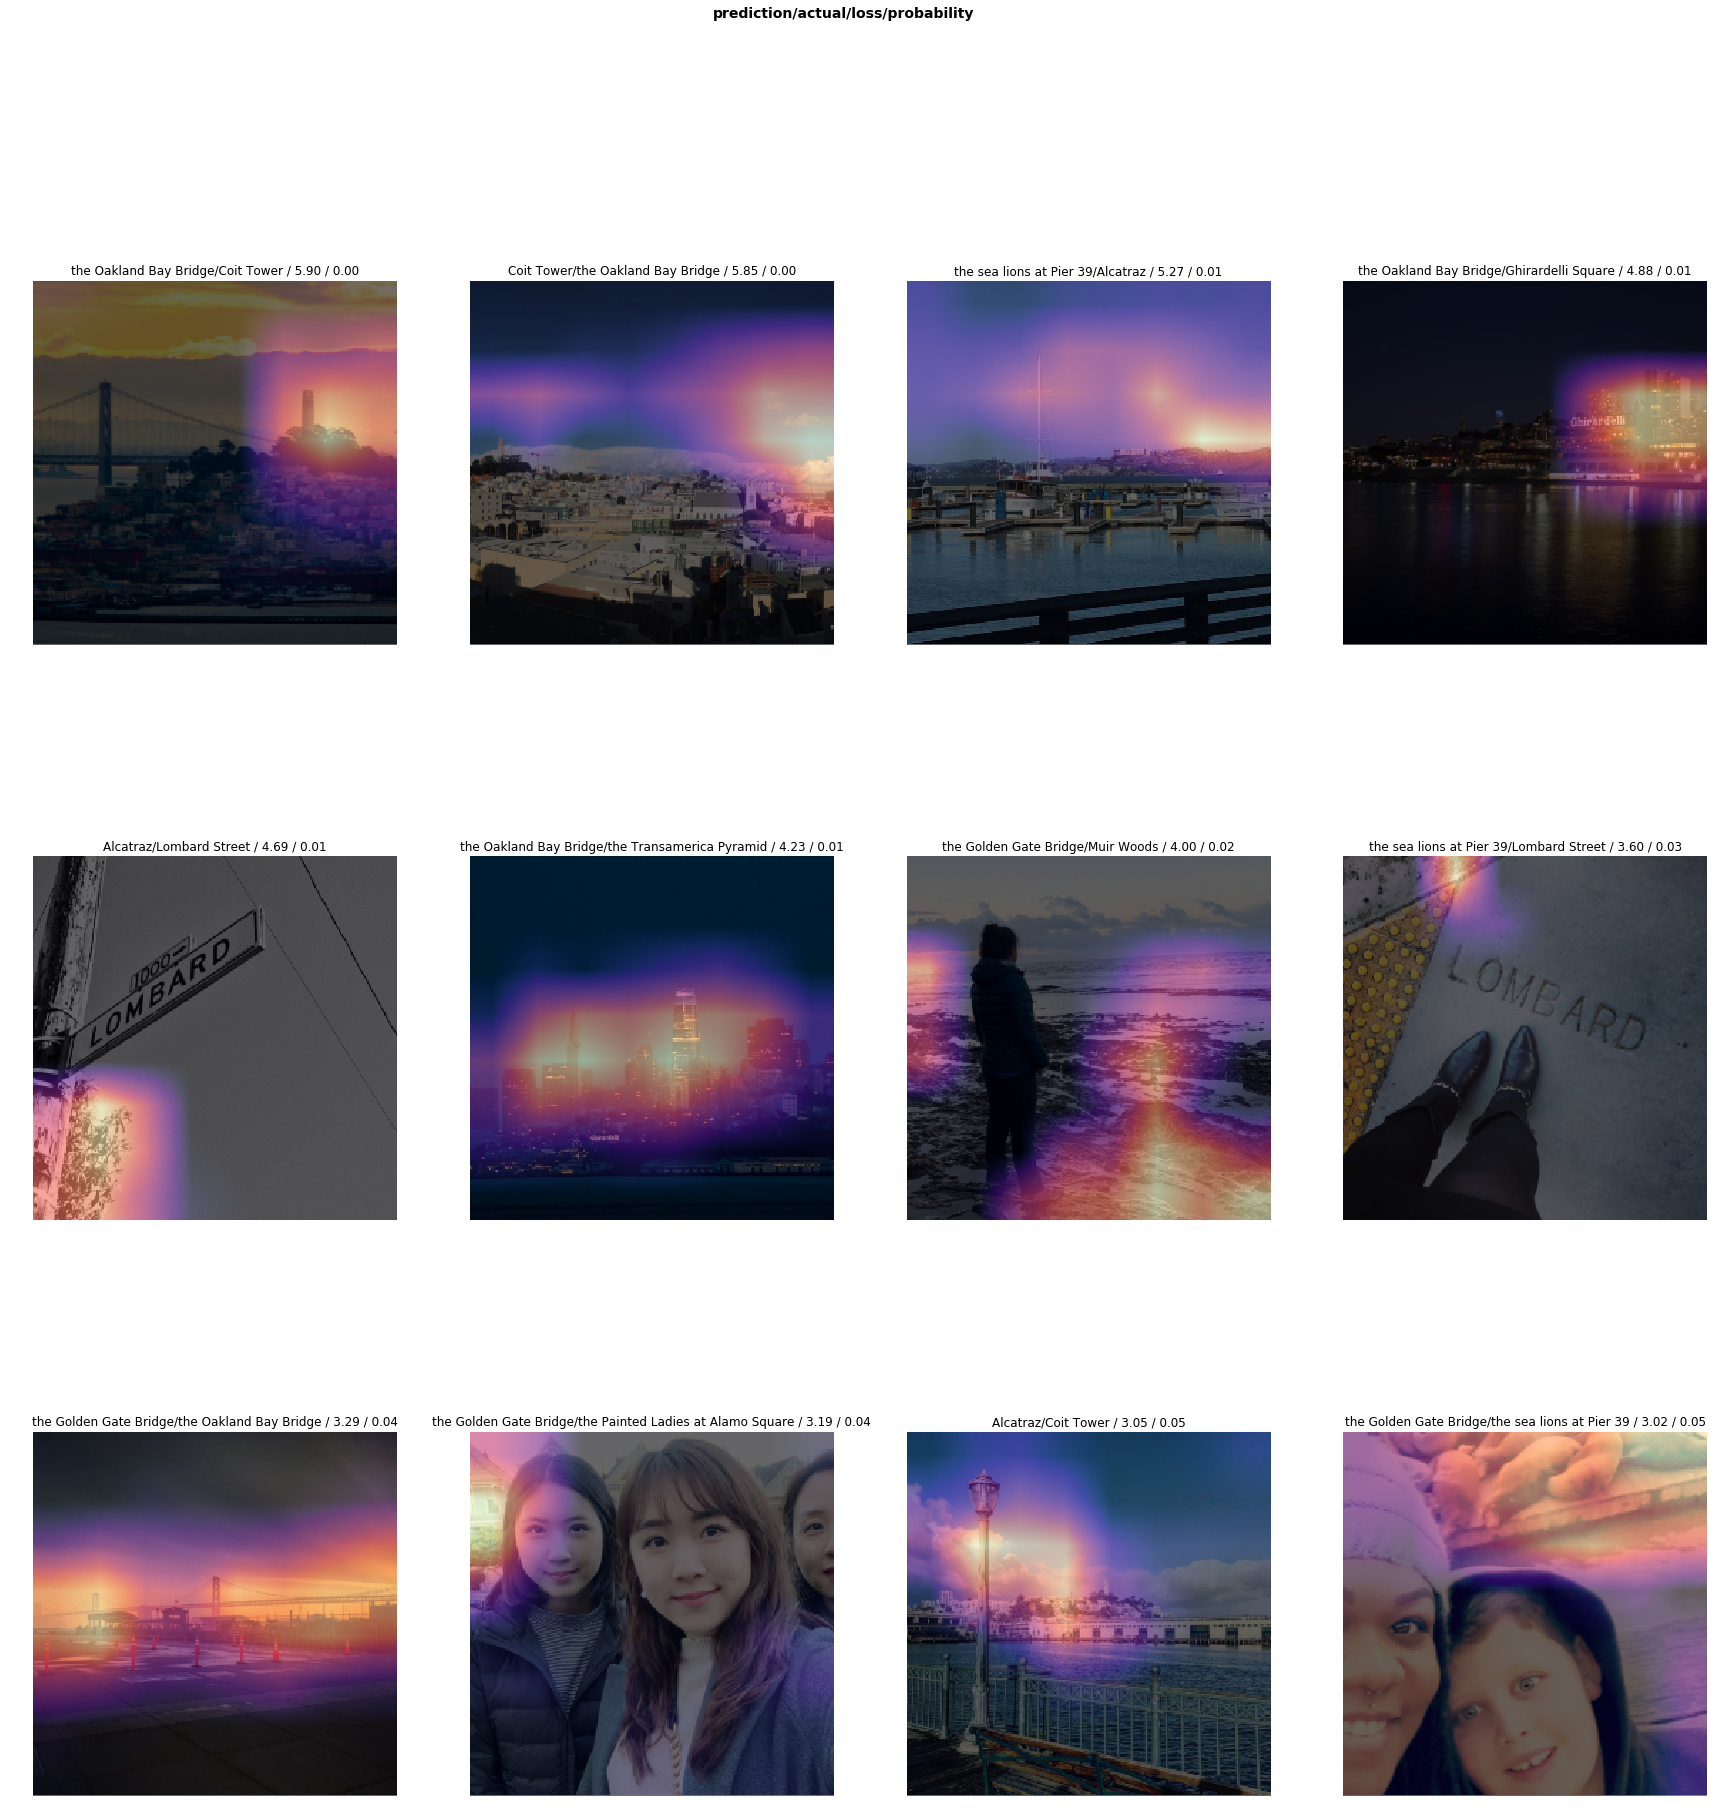

In [47]:
interp.plot_top_losses(12, figsize=(30,30))

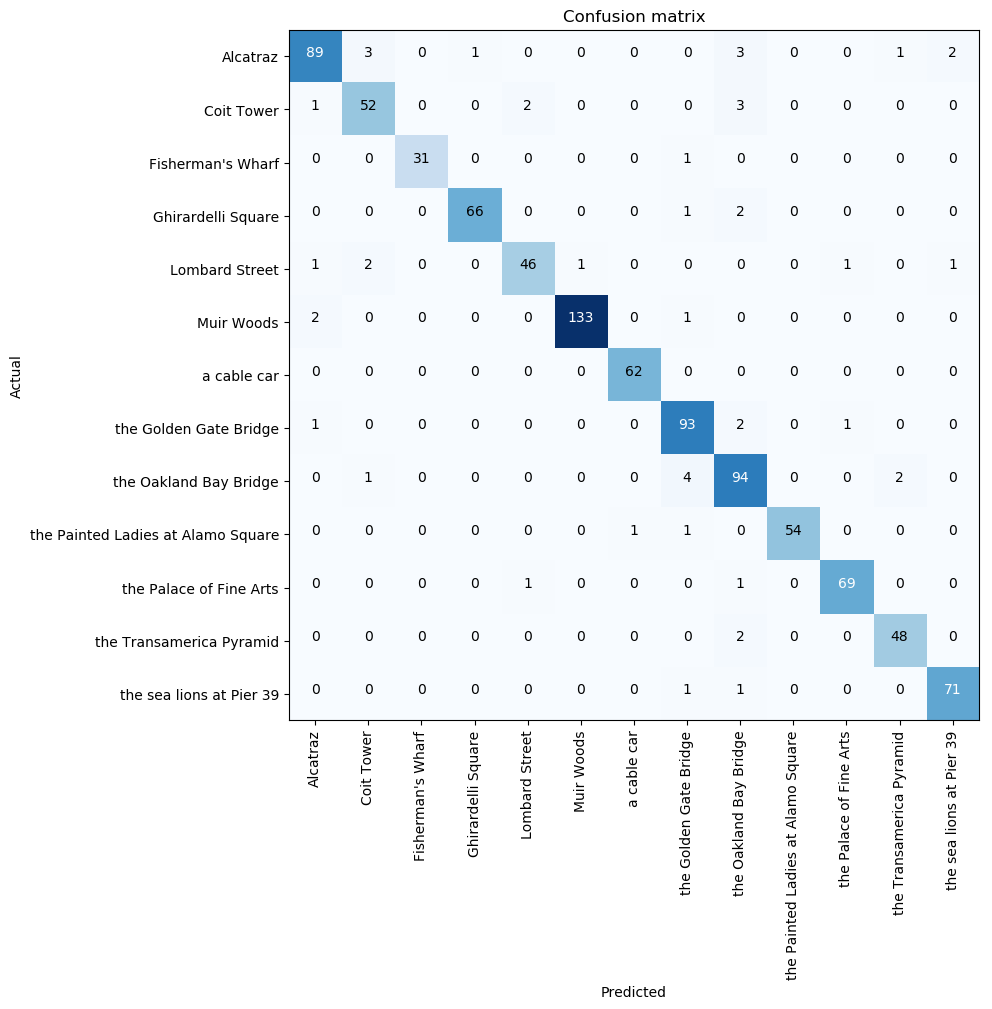

In [48]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=100)

In [49]:
interp.most_confused(min_val=0)

[('the Oakland Bay Bridge', 'the Golden Gate Bridge', 4),
 ('Alcatraz', 'Coit Tower', 3),
 ('Alcatraz', 'the Oakland Bay Bridge', 3),
 ('Coit Tower', 'the Oakland Bay Bridge', 3),
 ('Alcatraz', 'the sea lions at Pier 39', 2),
 ('Coit Tower', 'Lombard Street', 2),
 ('Ghirardelli Square', 'the Oakland Bay Bridge', 2),
 ('Lombard Street', 'Coit Tower', 2),
 ('Muir Woods', 'Alcatraz', 2),
 ('the Golden Gate Bridge', 'the Oakland Bay Bridge', 2),
 ('the Oakland Bay Bridge', 'the Transamerica Pyramid', 2),
 ('the Transamerica Pyramid', 'the Oakland Bay Bridge', 2),
 ('Alcatraz', 'Ghirardelli Square', 1),
 ('Alcatraz', 'the Transamerica Pyramid', 1),
 ('Coit Tower', 'Alcatraz', 1),
 ("Fisherman's Wharf", 'the Golden Gate Bridge', 1),
 ('Ghirardelli Square', 'the Golden Gate Bridge', 1),
 ('Lombard Street', 'Alcatraz', 1),
 ('Lombard Street', 'Muir Woods', 1),
 ('Lombard Street', 'the Palace of Fine Arts', 1),
 ('Lombard Street', 'the sea lions at Pier 39', 1),
 ('Muir Woods', 'the Golden Gate

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `ImageCleaner` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

First we need to get the file paths from our top_losses. We can do this with `.from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In [65]:
# stores top 30 losses - change n_imgs to load more
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid, n_imgs=30)

Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. `ImageCleaner` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses.ImageCleaner(ds, idxs)`

In [66]:
# set path to your folder that contains the training images
path = Path('/home/jupyter/projects/05-witty-tourist/images/train')

# load image cleaner widget
ImageCleaner(ds, idxs, path)

'No images to show :)'

You can also find duplicates in your dataset and delete them! To do this, you need to run `.from_similars` to get the potential duplicates' ids and then run `ImageCleaner` with `duplicates=True`. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

In [61]:
ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid, n_imgs=10)

Getting activations...


Computing similarities...


In [63]:
# #NOT WORKING## - load duplicate images widget
# ImageCleaner(ds, idxs, path, duplicates=True)

Remember to recreate your ImageDataBunch from your `cleaned.csv` to include the changes you made in your data!

You can also decide to re-train the model using your cleaned dataset.

## Test Set - Evaluate Performance

To test the performance of the model, we need to see how it performs on unseen images.  This can reveal if we over-fit our model to the training and validation data. To create a test set, we must first upload a brand new set of images and then __[follow these steps from the fast.ai docs](https://docs.fast.ai/data_block.html#LabelLists.add_test_folder)__

Start by uploading a zip file of all test images where each sub-folder is a different image class and then unzipping the file.

- __/images__
    - __/images/train__
        - /images/train/class1
        - /images/train/class2
        - ...
    - __/images/test__
        - /images/train/class1
        - /images/train/class2
        - ...

In [50]:
# only run this cell once
test_images_zip = zipfile.ZipFile('/home/jupyter/projects/05-witty-tourist/images/test/images-test.zip')
test_images_zip.extractall('/home/jupyter/projects/05-witty-tourist/images/test')
test_images_zip.close()

After extracting images, verify each image is an acceptable image file.

In [51]:
# set path to test images location
test_path = Path('/home/jupyter/projects/05-witty-tourist/images/test')

# class labels are set after importing training images
classes = classes

# verify each test image is an acceptable image file and remove files that aren't acceptable
for c in classes:
    print(c)
    verify_images(test_path/c, delete=True, max_workers=8)

the Golden Gate Bridge


the Oakland Bay Bridge


a cable car


Lombard Street


Alcatraz


the Painted Ladies at Alamo Square


the Palace of Fine Arts


the sea lions at Pier 39


the Transamerica Pyramid


Muir Woods


Coit Tower


Fisherman's Wharf


Ghirardelli Square


Create a databunch and store the test images in the "valid" variable where each classs label is from the folder storing the image.

In [52]:
# set path to your folder that contains the training and test images
images_path = Path('/home/jupyter/projects/05-witty-tourist/images')

# replace the validation dataset entry with the test dataset as a new validation dataset 
# replace `split_by_pct` (validation %) with `split_by_folder` 
# set valid='test'
data_test = (ImageList.from_folder(images_path)
        .split_by_folder(train='train', valid='test')
        .label_from_folder()
        .transform(tfms=tfms, size=256)
        .databunch(bs=64)
        .normalize(imagenet_stats)
       )

In [53]:
# show counts of classes, number of training images, number of test images
data_test.classes, data_test.c, len(data_test.train_ds), len(data_test.valid_ds)

(['Alcatraz',
  'Coit Tower',
  "Fisherman's Wharf",
  'Ghirardelli Square',
  'Lombard Street',
  'Muir Woods',
  'a cable car',
  'the Golden Gate Bridge',
  'the Oakland Bay Bridge',
  'the Painted Ladies at Alamo Square',
  'the Palace of Fine Arts',
  'the Transamerica Pyramid',
  'the sea lions at Pier 39'],
 13,
 4781,
 1007)

In [54]:
# load the saved learner you want to test

# load saved model
learn = load_learner(model_path,'wt-stage-4-resnet50-13-classes-256')

Test model performance on test set

In [55]:
# show test loss, error rate
learn.validate(data_test.valid_dl)

[0.09383902, tensor(0.0268)]

Let's take a look at our losses to better understand which images the model is mis-identifying and to check if we need to prune our dataset to remove bad or mis-labeled images.

In [56]:
# replace validation data in the trained model with the test data
learn.data = data_test

In [57]:
interp = ClassificationInterpretation.from_learner(learn)

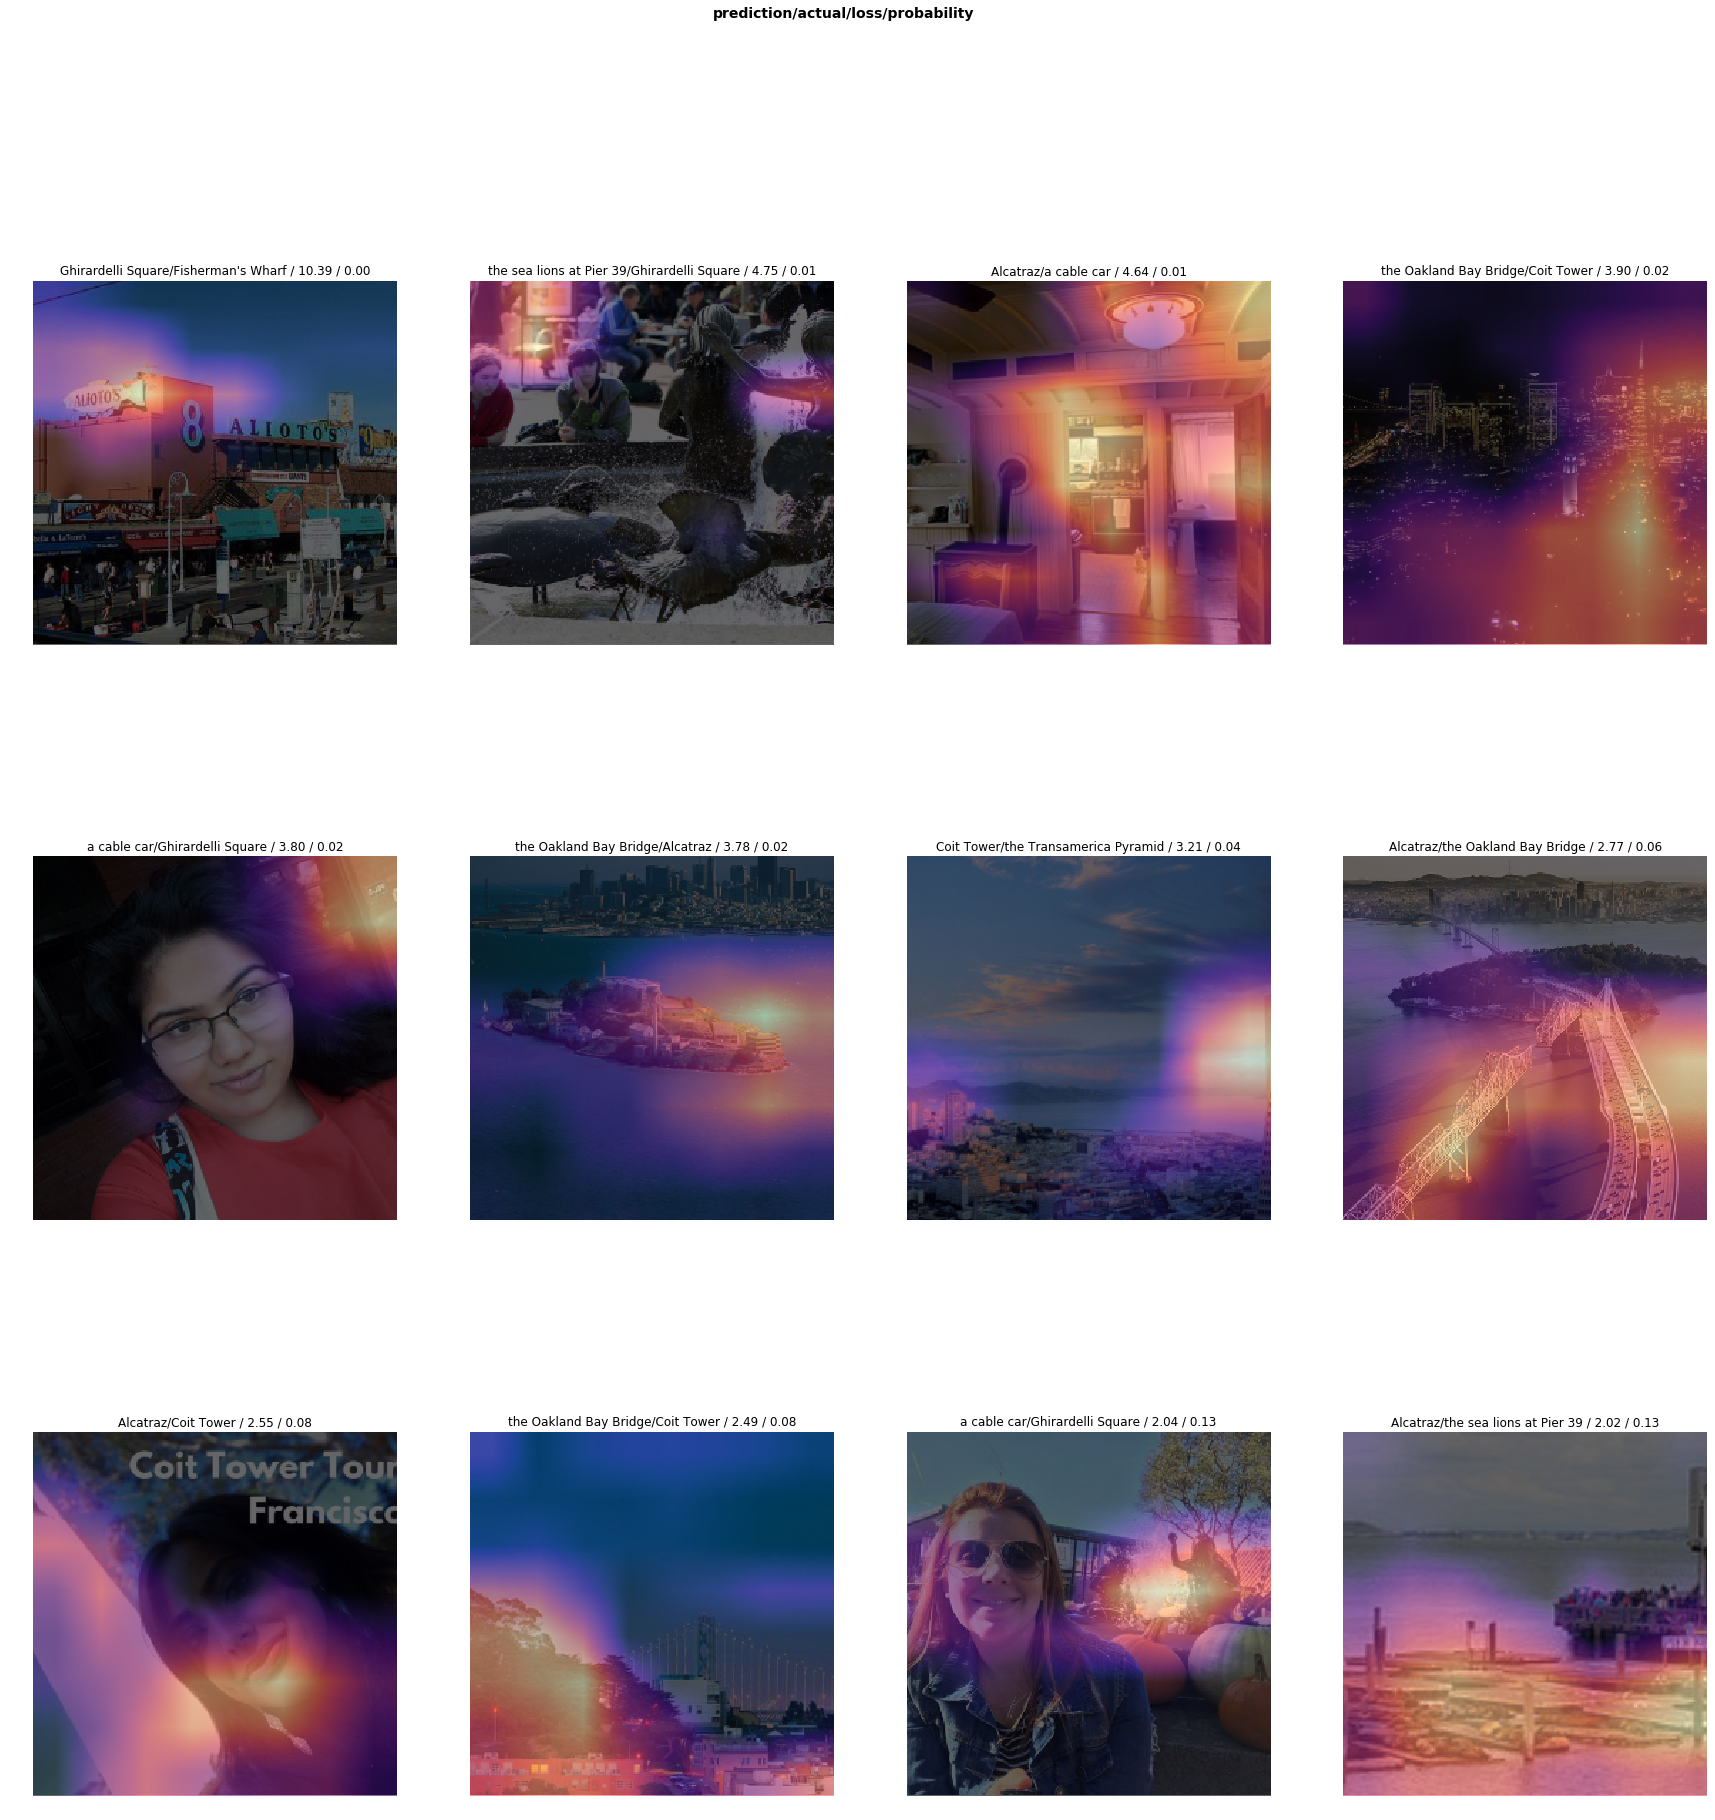

In [58]:
interp.plot_top_losses(12, figsize=(30,30))

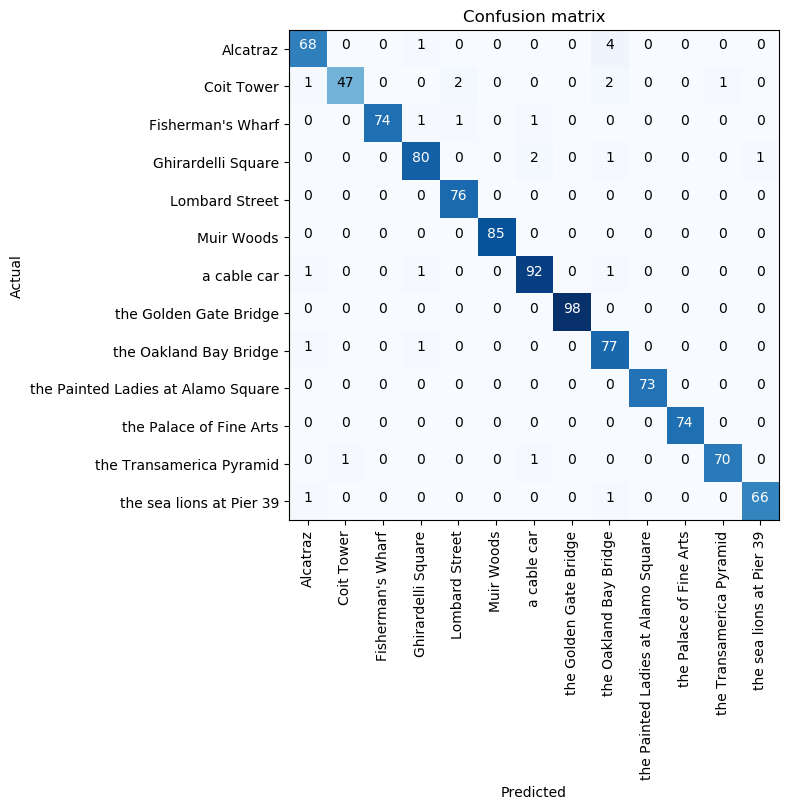

In [59]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=100)